In [73]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.circuit.library import StatePreparation
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_state_city


0.25


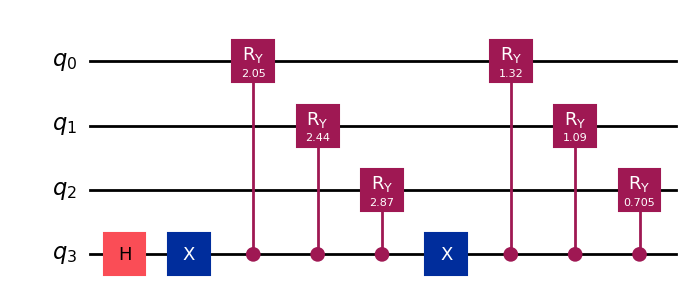

In [150]:
# Decaying exponential state: |ψ⟩ = N · Σ e^(-a·i) |i⟩  for i = 0 … 2^4-1
a = 0.5  # decay constant
n_qubits = 4

#theta = 2 * np.arctan(np.exp(-a))

qc = QuantumCircuit(n_qubits)
last_qubit = n_qubits - 1

qc.h(last_qubit)
qc.x(last_qubit)

b = a
for i in range(n_qubits-1):
    theta = 2 * np.arctan(np.exp(b))
    qc.cry(theta, last_qubit, i)
    b = b * 2
qc.x(last_qubit)

b = a/2.0
print(b)
for i in range(n_qubits-1):
    theta = 2 * np.arctan(np.exp(-b))
    qc.cry(theta, last_qubit, i)
    b = b * 2




qc.draw('mpl', style='iqp')


In [146]:
# Simulate the statevector using Qiskit's local statevector simulator
sv = Statevector(qc)

# print("Statevector amplitudes (|basis⟩ : amplitude):")
# for i, amp in enumerate(sv.data):
#     basis = format(i, f'0{n_qubits}b')
#     if abs(amp) > 1e-6:
#         print(f"  |{basis}⟩ : {amp:.4f}  (prob = {abs(amp)**2:.4f})")


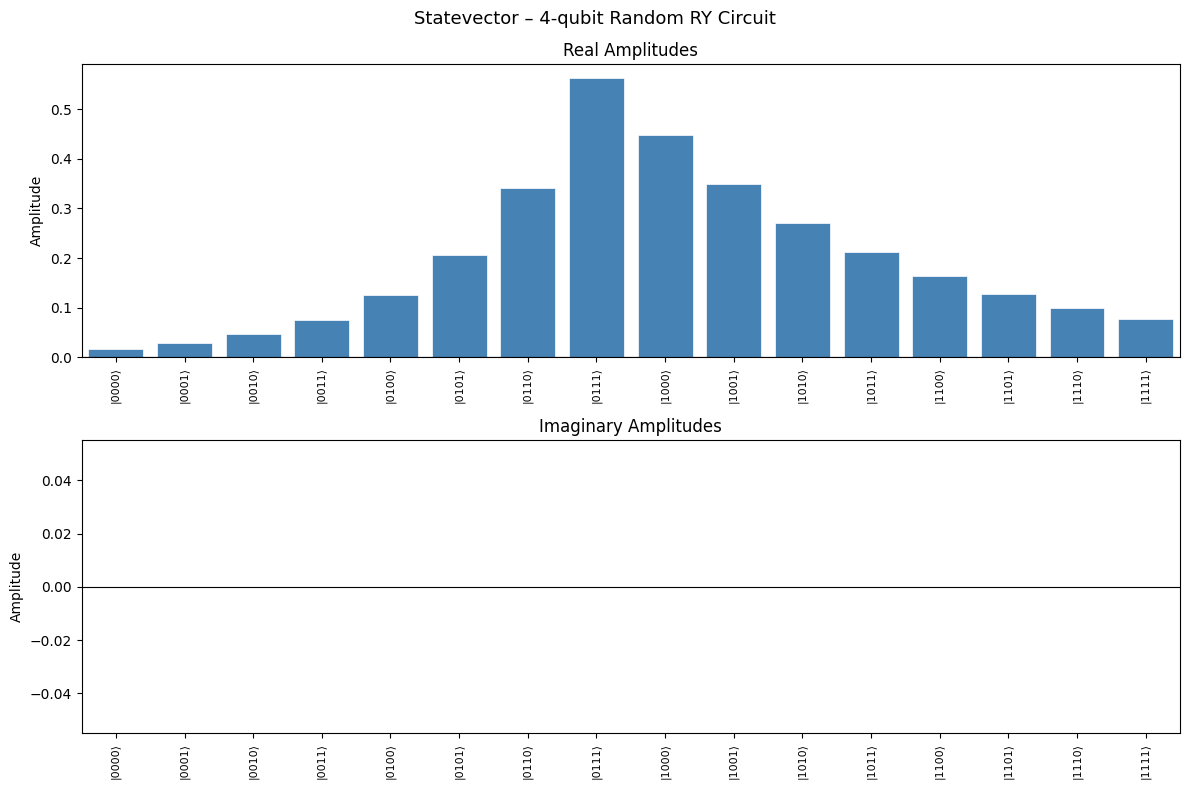

In [147]:

# Visualize statevector: two vertical bar charts stacked (real on top, imaginary below)
n_states = 2 ** n_qubits
basis_labels = [format(i, f'0{n_qubits}b') for i in range(n_states)]
real_parts = sv.data.real
imag_parts = sv.data.imag

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
fig.suptitle("Statevector – 4-qubit Random RY Circuit", fontsize=13)

x = np.arange(n_states)

ax1.bar(x, real_parts, color='steelblue', edgecolor='white', linewidth=0.5)
ax1.axhline(0, color='black', linewidth=0.8)
ax1.set_title("Real Amplitudes")
ax1.set_xticks(x)
ax1.set_xticklabels([f'|{b}⟩' for b in basis_labels], rotation=90, fontsize=8)
ax1.set_ylabel("Amplitude")
ax1.set_xlim(-0.5, n_states - 0.5)

ax2.bar(x, imag_parts, color='coral', edgecolor='white', linewidth=0.5)
ax2.axhline(0, color='black', linewidth=0.8)
ax2.set_title("Imaginary Amplitudes")
ax2.set_xticks(x)
ax2.set_xticklabels([f'|{b}⟩' for b in basis_labels], rotation=90, fontsize=8)
ax2.set_ylabel("Amplitude")
ax2.set_xlim(-0.5, n_states - 0.5)

plt.tight_layout()
plt.show()


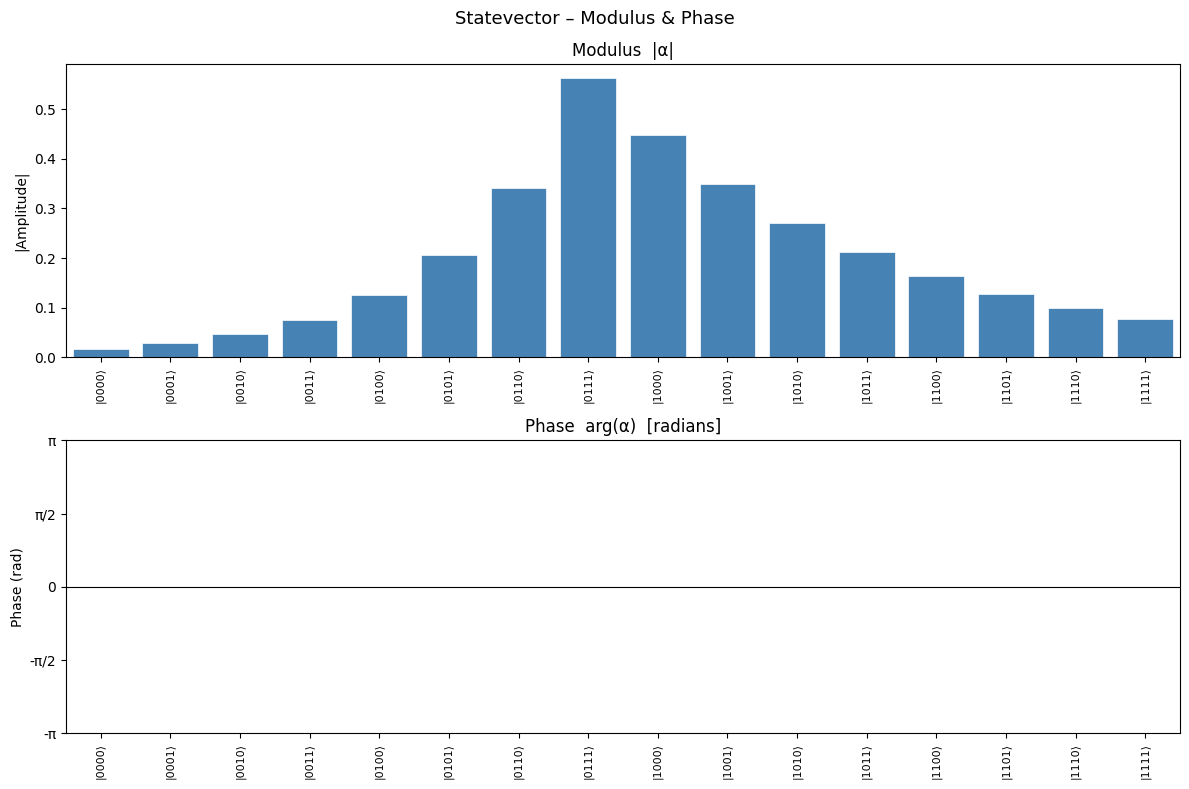

In [148]:
# Visualize statevector: modulus and phase stacked vertically
modulus = np.abs(sv.data)
phase = np.angle(sv.data)   # radians in (-π, π]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
fig.suptitle("Statevector – Modulus & Phase", fontsize=13)

x = np.arange(n_states)
tick_labels = [f'|{b}⟩' for b in basis_labels]

ax1.bar(x, modulus, color='steelblue', edgecolor='white', linewidth=0.5)
ax1.set_title("Modulus  |α|")
ax1.set_xticks(x)
ax1.set_xticklabels(tick_labels, rotation=90, fontsize=8)
ax1.set_ylabel("|Amplitude|")
ax1.set_xlim(-0.5, n_states - 0.5)
ax1.set_ylim(bottom=0)

ax2.bar(x, phase, color='darkorange', edgecolor='white', linewidth=0.5)
ax2.axhline(0, color='black', linewidth=0.8)
ax2.set_title("Phase  arg(α)  [radians]")
ax2.set_xticks(x)
ax2.set_xticklabels(tick_labels, rotation=90, fontsize=8)
ax2.set_ylabel("Phase (rad)")
ax2.set_xlim(-0.5, n_states - 0.5)
ax2.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax2.set_yticklabels(['-π', '-π/2', '0', 'π/2', 'π'])

plt.tight_layout()
plt.show()


Measurement results (1024 shots):
  |0000⟩ :    2  
  |0001⟩ :    1  
  |0010⟩ :    1  
  |0011⟩ :    6  
  |0100⟩ :   11  
  |0101⟩ :   44  █
  |0110⟩ :   90  ███
  |0111⟩ :  340  █████████████
  |1000⟩ :  208  ████████
  |1001⟩ :  125  ████
  |1010⟩ :   86  ███
  |1011⟩ :   52  ██
  |1100⟩ :   27  █
  |1101⟩ :   14  
  |1110⟩ :   11  
  |1111⟩ :    6  


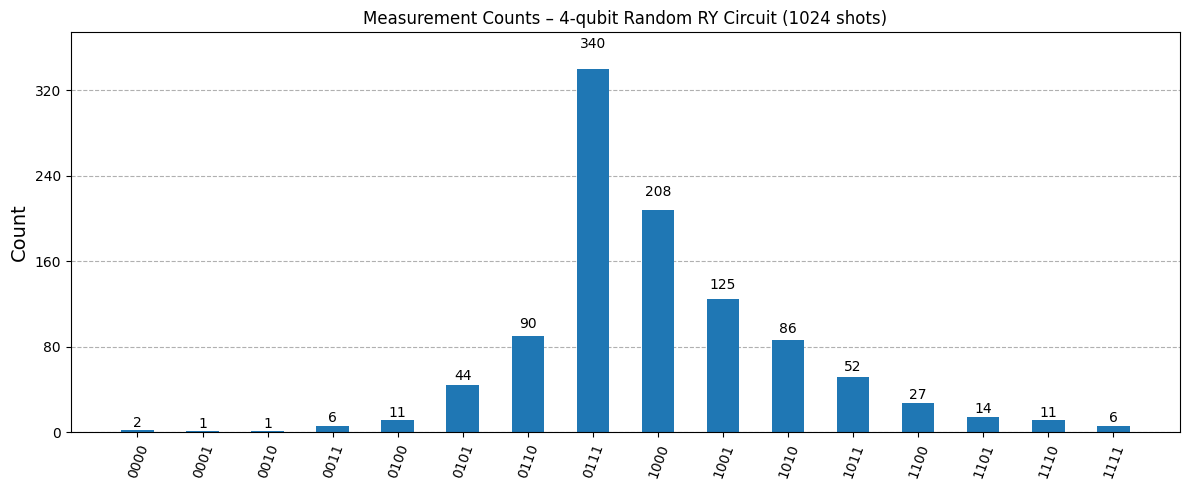

In [149]:
# Sample the statevector to get measurement counts (local simulator)
shots = 1024
counts = sv.sample_counts(shots)

print(f"Measurement results ({shots} shots):")
for state in sorted(counts.keys()):
    bar = '█' * int(counts[state] / shots * 40)
    print(f"  |{state}⟩ : {counts[state]:4d}  {bar}")

# Include all 2^n basis states (zeros for unobserved states)
all_basis = [format(i, f'0{n_qubits}b') for i in range(2 ** n_qubits)]
counts_full = {b: counts.get(b, 0) for b in all_basis}

# Plot histogram of sample counts
fig = plot_histogram(
    counts_full,
    title=f"Measurement Counts – 4-qubit Random RY Circuit ({shots} shots)",
    figsize=(12, 5),
    bar_labels=True,
)
fig.tight_layout()
display(fig)
